[View in Colaboratory](https://colab.research.google.com/github/Curiousss/InkerIntern/blob/master/FER_WINO_SEPARABLE_NO_CUDNN.ipynb)

In [4]:
from google.colab import files
uploaded = files.upload()

Saving baddata.txt to baddata.txt


In [1]:
!ls

datalab


In [42]:
import os
!export TF_ENABLE_WINOGRAD_NONFUSED=1
os.environ['TF_ENABLE_WINOGRAD_NONFUSED'] = '1'
os.environ.pop('TF_ENABLE_WINOGRAD_NONFUSED', None)

'1'

In [2]:
!tar xvf fer2013.tar
!ls

fer2013/fer2013.csv
fer2013/README
fer2013/fer2013.bib
fer2013/
datalab  fer2013  fer2013.tar


In [5]:

import csv
import numpy as np

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, GlobalAveragePooling2D, InputLayer
from keras.layers import Convolution2D, SeparableConv2D, MaxPooling2D, BatchNormalization 
from keras.layers.advanced_activations import LeakyReLU
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

Using TensorFlow backend.


In [0]:
img_rows, img_cols = 48, 48
batch_size = 128
classes = 7
epoch = 100
img_channels = 1

In [0]:
import csv
f = open('fer2013/fer2013.csv')
csv_f = csv.reader(f)


In [0]:
train_x = []
train_y = []
val_x =[]
val_y =[]

In [0]:
ToBeRemovedTrainingData = []
with open("baddata.txt", "r") as text:
  for line in text:
    ToBeRemovedTrainingData.append(int(line))

In [0]:
num=0
for row in csv_f:
  num = num +1
  if num in ToBeRemovedTrainingData or num==1:
    continue
  #print(row)
  #print(num)
  temp_list = []
  for pixel in row[1].split( ):
    temp_list.append(int(pixel))

  if str(row[2]) == "Training":
    train_y.append(int(row[0]))
    train_x.append(temp_list) 
  elif str(row[2]) == "PublicTest":
    val_y.append(int(row[0]))
    val_x.append(temp_list)

In [0]:
train_x = np.asarray(train_x)
train_y = np.asarray(train_y)
val_x = np.asarray(val_x)
val_y = np.asarray(val_y)

In [0]:
train_x = train_x.reshape(train_x.shape[0], 48, 48)
train_x = train_x.reshape(train_x.shape[0], 48, 48, 1 )
train_y = np_utils.to_categorical(train_y, 7)

In [0]:
val_x = val_x.reshape(val_x.shape[0], 48, 48)
val_x = val_x.reshape(val_x.shape[0], 48, 48, 1)
val_y = np_utils.to_categorical(val_y, 7)

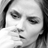

In [15]:
from PIL import Image

#print(train_x.shape)

showimg = train_x[1].reshape(48,48)
img = Image.fromarray(showimg.astype('uint8'))
from IPython.display import display
display(img)

In [0]:
train_x = train_x.astype('float32')
train_x = train_x / 255.0
val_x = val_x.astype('float32')
val_x = val_x / 255.0
train_x = train_x - 0.5
train_x = train_x * 2
val_x = val_x - 0.5
val_x = val_x * 2


In [0]:
input_shape = (img_rows, img_cols, img_channels)
model = Sequential()
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same',
                            name='image_array', input_shape=input_shape))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=64, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=128, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=256, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(SeparableConv2D(filters=512, kernel_size=(3, 3), padding='same'))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(Dropout(.3))

#model.add(Flatten())
'''
model.add(Dense(1024))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))

model.add(Dense(2048))
model.add(BatchNormalization())
model.add(LeakyReLU())
model.add(Dropout(.5))
'''
model.add(InputLayer(input_shape=(3, 3, 1024)))
model.add(GlobalAveragePooling2D())
model.add(Dense(7))
model.add(Activation('softmax'))

In [51]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
image_array (SeparableConv2D (None, 48, 48, 64)        137       
_________________________________________________________________
batch_normalization_27 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_27 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
separable_conv2d_22 (Separab (None, 48, 48, 64)        4736      
_________________________________________________________________
batch_normalization_28 (Batc (None, 48, 48, 64)        256       
_________________________________________________________________
leaky_re_lu_28 (LeakyReLU)   (None, 48, 48, 64)        0         
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 24, 24, 64)        0         
__________

In [0]:
model.compile(optimizer='Adam',
                 loss='categorical_crossentropy',
                 metrics=['accuracy'])
filepath='Model.best.hdf5'
checkpointer = keras.callbacks.ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='auto')


In [0]:
model.load_weights('Model.best.hdf5')

In [23]:
# LReLU
import time
start_time = time.time()

model.fit(train_x, train_y, epochs=50, batch_size=batch_size, validation_data=(val_x, val_y), callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Train on 28595 samples, validate on 3585 samples
Epoch 1/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.7075 - acc: 0.7420 - val_loss: 0.9628 - val_acc: 0.6522

Epoch 00001: val_acc did not improve from 0.65914
Epoch 2/50
25984/28595 [==========================>...] - ETA: 4s - loss: 0.6731 - acc: 0.7522

28595/28595 [==============================] - 52s 2ms/step - loss: 0.6755 - acc: 0.7515 - val_loss: 1.0152 - val_acc: 0.6569

Epoch 00002: val_acc did not improve from 0.65914
Epoch 3/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.6598 - acc: 0.7600 - val_loss: 1.0179 - val_acc: 0.6452

Epoch 00003: val_acc did not improve from 0.65914
Epoch 4/50
10112/28595 [=========>....................] - ETA: 32s - loss: 0.6191 - acc: 0.7762

28595/28595 [==============================] - 52s 2ms/step - loss: 0.6424 - acc: 0.7626 - val_loss: 1.0279 - val_acc: 0.6491

Epoch 00004: val_acc did not improve from 0.65914
Epoch 5/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.6282 - acc: 0.7692 - val_loss: 1.0259 - val_acc: 0.6575

Epoch 00005: val_acc did not improve from 0.65914
Epoch 6/50
 7296/28595 [======>.......................] - ETA: 37s - loss: 0.5956 - acc: 0.7797

28595/28595 [==============================] - 52s 2ms/step - loss: 0.6148 - acc: 0.7734 - val_loss: 0.9954 - val_acc: 0.6625

Epoch 00006: val_acc improved from 0.65914 to 0.66248, saving model to Model.best.hdf5
Epoch 7/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.5981 - acc: 0.7794 - val_loss: 1.0378 - val_acc: 0.6622

Epoch 00007: val_acc did not improve from 0.66248
Epoch 8/50
 4096/28595 [===>..........................] - ETA: 43s - loss: 0.5680 - acc: 0.7920

28595/28595 [==============================] - 52s 2ms/step - loss: 0.5905 - acc: 0.7822 - val_loss: 1.0229 - val_acc: 0.6594

Epoch 00008: val_acc did not improve from 0.66248
Epoch 9/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.5770 - acc: 0.7890 - val_loss: 1.0805 - val_acc: 0.6522

Epoch 00009: val_acc did not improve from 0.66248
Epoch 10/50
 6144/28595 [=====>........................] - ETA: 39s - loss: 0.5427 - acc: 0.8037

28595/28595 [==============================] - 52s 2ms/step - loss: 0.5619 - acc: 0.7940 - val_loss: 1.0323 - val_acc: 0.6608

Epoch 00010: val_acc did not improve from 0.66248
Epoch 11/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.5504 - acc: 0.7995 - val_loss: 1.0551 - val_acc: 0.6667

Epoch 00011: val_acc improved from 0.66248 to 0.66667, saving model to Model.best.hdf5
Epoch 12/50
 5888/28595 [=====>........................] - ETA: 39s - loss: 0.5097 - acc: 0.8196

28595/28595 [==============================] - 52s 2ms/step - loss: 0.5399 - acc: 0.8029 - val_loss: 1.1107 - val_acc: 0.6619

Epoch 00012: val_acc did not improve from 0.66667
Epoch 13/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.5287 - acc: 0.8084 - val_loss: 1.0576 - val_acc: 0.6608

Epoch 00013: val_acc did not improve from 0.66667
Epoch 14/50
 6400/28595 [=====>........................] - ETA: 38s - loss: 0.4969 - acc: 0.8177

28595/28595 [==============================] - 52s 2ms/step - loss: 0.5234 - acc: 0.8063 - val_loss: 1.0448 - val_acc: 0.6692

Epoch 00014: val_acc improved from 0.66667 to 0.66918, saving model to Model.best.hdf5
Epoch 15/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.5093 - acc: 0.8123 - val_loss: 1.0503 - val_acc: 0.6664

Epoch 00015: val_acc did not improve from 0.66918
Epoch 16/50
 3840/28595 [===>..........................] - ETA: 43s - loss: 0.4637 - acc: 0.8378

28595/28595 [==============================] - 52s 2ms/step - loss: 0.5009 - acc: 0.8178 - val_loss: 1.0700 - val_acc: 0.6630

Epoch 00016: val_acc did not improve from 0.66918
Epoch 17/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4944 - acc: 0.8198 - val_loss: 1.0801 - val_acc: 0.6589

Epoch 00017: val_acc did not improve from 0.66918
Epoch 18/50
 6016/28595 [=====>........................] - ETA: 39s - loss: 0.4581 - acc: 0.8329

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4900 - acc: 0.8192 - val_loss: 1.0731 - val_acc: 0.6658

Epoch 00018: val_acc did not improve from 0.66918
Epoch 19/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4669 - acc: 0.8294 - val_loss: 1.1012 - val_acc: 0.6636

Epoch 00019: val_acc did not improve from 0.66918
Epoch 20/50
 6400/28595 [=====>........................] - ETA: 38s - loss: 0.4461 - acc: 0.8386

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4717 - acc: 0.8266 - val_loss: 1.1356 - val_acc: 0.6580

Epoch 00020: val_acc did not improve from 0.66918
Epoch 21/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4595 - acc: 0.8316 - val_loss: 1.1244 - val_acc: 0.6644

Epoch 00021: val_acc did not improve from 0.66918
Epoch 22/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.4244 - acc: 0.8418

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4509 - acc: 0.8347 - val_loss: 1.1035 - val_acc: 0.6619

Epoch 00022: val_acc did not improve from 0.66918
Epoch 23/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4543 - acc: 0.8342 - val_loss: 1.1276 - val_acc: 0.6608

Epoch 00023: val_acc did not improve from 0.66918
Epoch 24/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.4119 - acc: 0.8516

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4434 - acc: 0.8387 - val_loss: 1.0854 - val_acc: 0.6700

Epoch 00024: val_acc improved from 0.66918 to 0.67001, saving model to Model.best.hdf5
Epoch 25/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4358 - acc: 0.8386 - val_loss: 1.1194 - val_acc: 0.6639

Epoch 00025: val_acc did not improve from 0.67001
Epoch 26/50
 3840/28595 [===>..........................] - ETA: 43s - loss: 0.3982 - acc: 0.8526

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4275 - acc: 0.8437 - val_loss: 1.1517 - val_acc: 0.6689

Epoch 00026: val_acc did not improve from 0.67001
Epoch 27/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4241 - acc: 0.8465 - val_loss: 1.1319 - val_acc: 0.6667

Epoch 00027: val_acc did not improve from 0.67001
Epoch 28/50
 6016/28595 [=====>........................] - ETA: 39s - loss: 0.4023 - acc: 0.8536

28595/28595 [==============================] - 52s 2ms/step - loss: 0.4109 - acc: 0.8513 - val_loss: 1.1818 - val_acc: 0.6653

Epoch 00028: val_acc did not improve from 0.67001
Epoch 29/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.4065 - acc: 0.8513 - val_loss: 1.1410 - val_acc: 0.6664

Epoch 00029: val_acc did not improve from 0.67001
Epoch 30/50
 6400/28595 [=====>........................] - ETA: 38s - loss: 0.3933 - acc: 0.8580

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3994 - acc: 0.8536 - val_loss: 1.1856 - val_acc: 0.6647

Epoch 00030: val_acc did not improve from 0.67001
Epoch 31/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3979 - acc: 0.8558 - val_loss: 1.1573 - val_acc: 0.6644

Epoch 00031: val_acc did not improve from 0.67001
Epoch 32/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3648 - acc: 0.8644

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3896 - acc: 0.8569 - val_loss: 1.1412 - val_acc: 0.6639

Epoch 00032: val_acc did not improve from 0.67001
Epoch 33/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3852 - acc: 0.8613 - val_loss: 1.1937 - val_acc: 0.6675

Epoch 00033: val_acc did not improve from 0.67001
Epoch 34/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3548 - acc: 0.8745

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3790 - acc: 0.8621 - val_loss: 1.1681 - val_acc: 0.6586

Epoch 00034: val_acc did not improve from 0.67001
Epoch 35/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3752 - acc: 0.8609 - val_loss: 1.1846 - val_acc: 0.6636

Epoch 00035: val_acc did not improve from 0.67001
Epoch 36/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3538 - acc: 0.8727

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3729 - acc: 0.8644 - val_loss: 1.1917 - val_acc: 0.6603

Epoch 00036: val_acc did not improve from 0.67001
Epoch 37/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3659 - acc: 0.8690 - val_loss: 1.1739 - val_acc: 0.6644

Epoch 00037: val_acc did not improve from 0.67001
Epoch 38/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3415 - acc: 0.8776

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3592 - acc: 0.8683 - val_loss: 1.1900 - val_acc: 0.6633

Epoch 00038: val_acc did not improve from 0.67001
Epoch 39/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3584 - acc: 0.8696 - val_loss: 1.1743 - val_acc: 0.6642

Epoch 00039: val_acc did not improve from 0.67001
Epoch 40/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3214 - acc: 0.8860

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3466 - acc: 0.8753 - val_loss: 1.2020 - val_acc: 0.6608

Epoch 00040: val_acc did not improve from 0.67001
Epoch 41/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3495 - acc: 0.8718 - val_loss: 1.2179 - val_acc: 0.6625

Epoch 00041: val_acc did not improve from 0.67001
Epoch 42/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3330 - acc: 0.8805

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3449 - acc: 0.8731 - val_loss: 1.2040 - val_acc: 0.6672

Epoch 00042: val_acc did not improve from 0.67001
Epoch 43/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3419 - acc: 0.8756 - val_loss: 1.2115 - val_acc: 0.6630

Epoch 00043: val_acc did not improve from 0.67001
Epoch 44/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3187 - acc: 0.8822

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3379 - acc: 0.8781 - val_loss: 1.2434 - val_acc: 0.6572

Epoch 00044: val_acc did not improve from 0.67001
Epoch 45/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3250 - acc: 0.8803 - val_loss: 1.2330 - val_acc: 0.6619

Epoch 00045: val_acc did not improve from 0.67001
Epoch 46/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3057 - acc: 0.8948

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3293 - acc: 0.8824 - val_loss: 1.2289 - val_acc: 0.6611

Epoch 00046: val_acc did not improve from 0.67001
Epoch 47/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3289 - acc: 0.8809 - val_loss: 1.2550 - val_acc: 0.6561

Epoch 00047: val_acc did not improve from 0.67001
Epoch 48/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3079 - acc: 0.8854

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3208 - acc: 0.8838 - val_loss: 1.2594 - val_acc: 0.6583

Epoch 00048: val_acc did not improve from 0.67001
Epoch 49/50
28595/28595 [==============================] - 52s 2ms/step - loss: 0.3176 - acc: 0.8845 - val_loss: 1.2558 - val_acc: 0.6669

Epoch 00049: val_acc did not improve from 0.67001
Epoch 50/50
 6528/28595 [=====>........................] - ETA: 38s - loss: 0.3054 - acc: 0.8902

28595/28595 [==============================] - 52s 2ms/step - loss: 0.3208 - acc: 0.8827 - val_loss: 1.2596 - val_acc: 0.6616

Epoch 00050: val_acc did not improve from 0.67001
--- 2601.835676431656 seconds ---


In [50]:
# input normalized
import time
start_time = time.time()

model.fit(train_x, train_y, epochs=10, batch_size=batch_size, validation_data=(val_x, val_y))
print("--- %s seconds ---" % (time.time() - start_time))

Train on 28709 samples, validate on 3589 samples
Epoch 1/10
28709/28709 [==============================] - 162s 6ms/step - loss: 2.0189 - acc: 0.2407 - val_loss: 1.8390 - val_acc: 0.2856
Epoch 2/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.8329 - acc: 0.2909 - val_loss: 1.7546 - val_acc: 0.3391
Epoch 3/10
  896/28709 [..............................] - ETA: 2:27 - loss: 1.7662 - acc: 0.3058

28709/28709 [==============================] - 157s 5ms/step - loss: 1.7695 - acc: 0.3230 - val_loss: 1.8986 - val_acc: 0.3093
Epoch 4/10
28709/28709 [==============================] - 157s 5ms/step - loss: 1.7122 - acc: 0.3484 - val_loss: 1.6657 - val_acc: 0.3611
Epoch 5/10
10880/28709 [==========>...................] - ETA: 1:34 - loss: 1.6901 - acc: 0.3509

28709/28709 [==============================] - 156s 5ms/step - loss: 1.6773 - acc: 0.3604 - val_loss: 1.7014 - val_acc: 0.3494
Epoch 6/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.6553 - acc: 0.3702 - val_loss: 1.6194 - val_acc: 0.3859
Epoch 7/10
13312/28709 [============>.................] - ETA: 1:20 - loss: 1.6141 - acc: 0.3857

28709/28709 [==============================] - 156s 5ms/step - loss: 1.6129 - acc: 0.3857 - val_loss: 1.6001 - val_acc: 0.3923
Epoch 8/10
28709/28709 [==============================] - 156s 5ms/step - loss: 1.5920 - acc: 0.3924 - val_loss: 1.6594 - val_acc: 0.4035
Epoch 9/10
13824/28709 [=============>................] - ETA: 1:18 - loss: 1.5641 - acc: 0.4065

28709/28709 [==============================] - 157s 5ms/step - loss: 1.5559 - acc: 0.4044 - val_loss: 1.5507 - val_acc: 0.4113
Epoch 10/10
28709/28709 [==============================] - 157s 5ms/step - loss: 1.5341 - acc: 0.4100 - val_loss: 1.5732 - val_acc: 0.4068
--- 1574.3259291648865 seconds ---


In [21]:

import time
start_time = time.time()

datagen = ImageDataGenerator(
    featurewise_center=False,  # set input mean to 0 over the dataset
    samplewise_center=False,  # set each sample mean to 0
    featurewise_std_normalization=False,  # divide inputs by std of the dataset
    samplewise_std_normalization=False,  # divide each input by its std
    zca_whitening=False,  # apply ZCA whitening
    rotation_range=30,  # randomly rotate images in the range (degrees, 0 to 180)
    width_shift_range=0,  # randomly shift images horizontally (fraction of total width)
    height_shift_range=0,  # randomly shift images vertically (fraction of total height)
    horizontal_flip=False,  # randomly flip images
    vertical_flip=False)  # randomly flip images

datagen.fit(train_x)

model.fit_generator(datagen.flow(train_x, train_y,
                    batch_size=batch_size),
                    steps_per_epoch=(train_x.shape[0]/batch_size),
                    epochs=50,
                    validation_data=(val_x, val_y),
                    callbacks=[checkpointer])
print("--- %s seconds ---" % (time.time() - start_time))

Epoch 1/50
224/223 [==============================] - 53s 236ms/step - loss: 0.9003 - acc: 0.6648 - val_loss: 1.0531 - val_acc: 0.6220

Epoch 00001: val_acc did not improve from 0.63961
Epoch 2/50
224/223 [==============================] - 53s 235ms/step - loss: 0.8919 - acc: 0.6664 - val_loss: 1.0446 - val_acc: 0.6310

Epoch 00002: val_acc did not improve from 0.63961
Epoch 3/50
 36/223 [===>..........................] - ETA: 42s - loss: 0.8790 - acc: 0.6808

224/223 [==============================] - 53s 235ms/step - loss: 0.8823 - acc: 0.6721 - val_loss: 1.0371 - val_acc: 0.6234

Epoch 00003: val_acc did not improve from 0.63961
Epoch 4/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8758 - acc: 0.6716 - val_loss: 1.0301 - val_acc: 0.6363

Epoch 00004: val_acc did not improve from 0.63961
Epoch 5/50
 54/223 [======>.......................] - ETA: 38s - loss: 0.8643 - acc: 0.6827

224/223 [==============================] - 52s 234ms/step - loss: 0.8792 - acc: 0.6732 - val_loss: 1.0170 - val_acc: 0.6424

Epoch 00005: val_acc improved from 0.63961 to 0.64240, saving model to Model.best.hdf5
Epoch 6/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8762 - acc: 0.6715 - val_loss: 1.0377 - val_acc: 0.6424

Epoch 00006: val_acc did not improve from 0.64240
Epoch 7/50
 36/223 [===>..........................] - ETA: 42s - loss: 0.8551 - acc: 0.6808

224/223 [==============================] - 52s 234ms/step - loss: 0.8708 - acc: 0.6758 - val_loss: 1.0337 - val_acc: 0.6315

Epoch 00007: val_acc did not improve from 0.64240
Epoch 8/50
224/223 [==============================] - 53s 235ms/step - loss: 0.8677 - acc: 0.6773 - val_loss: 1.0320 - val_acc: 0.6418

Epoch 00008: val_acc did not improve from 0.64240
Epoch 9/50
 54/223 [======>.......................] - ETA: 38s - loss: 0.8408 - acc: 0.6875

224/223 [==============================] - 52s 234ms/step - loss: 0.8572 - acc: 0.6801 - val_loss: 1.0682 - val_acc: 0.6343

Epoch 00009: val_acc did not improve from 0.64240
Epoch 10/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8519 - acc: 0.6828 - val_loss: 1.0535 - val_acc: 0.6388

Epoch 00010: val_acc did not improve from 0.64240
Epoch 11/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.8346 - acc: 0.6846

224/223 [==============================] - 52s 234ms/step - loss: 0.8492 - acc: 0.6834 - val_loss: 1.0351 - val_acc: 0.6471

Epoch 00011: val_acc improved from 0.64240 to 0.64714, saving model to Model.best.hdf5
Epoch 12/50
224/223 [==============================] - 53s 234ms/step - loss: 0.8476 - acc: 0.6843 - val_loss: 1.0267 - val_acc: 0.6393

Epoch 00012: val_acc did not improve from 0.64714
Epoch 13/50
 36/223 [===>..........................] - ETA: 42s - loss: 0.8419 - acc: 0.6886

224/223 [==============================] - 52s 234ms/step - loss: 0.8474 - acc: 0.6843 - val_loss: 1.0526 - val_acc: 0.6424

Epoch 00013: val_acc did not improve from 0.64714
Epoch 14/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8402 - acc: 0.6871 - val_loss: 1.0760 - val_acc: 0.6351

Epoch 00014: val_acc did not improve from 0.64714
Epoch 15/50
 53/223 [======>.......................] - ETA: 38s - loss: 0.8072 - acc: 0.7050

224/223 [==============================] - 53s 234ms/step - loss: 0.8385 - acc: 0.6901 - val_loss: 1.0559 - val_acc: 0.6354

Epoch 00015: val_acc did not improve from 0.64714
Epoch 16/50
224/223 [==============================] - 53s 235ms/step - loss: 0.8340 - acc: 0.6895 - val_loss: 1.0230 - val_acc: 0.6463

Epoch 00016: val_acc did not improve from 0.64714
Epoch 17/50
 56/223 [======>.......................] - ETA: 37s - loss: 0.8082 - acc: 0.7070

224/223 [==============================] - 52s 234ms/step - loss: 0.8255 - acc: 0.6928 - val_loss: 1.0323 - val_acc: 0.6416

Epoch 00017: val_acc did not improve from 0.64714
Epoch 18/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8247 - acc: 0.6927 - val_loss: 1.0220 - val_acc: 0.6469

Epoch 00018: val_acc did not improve from 0.64714
Epoch 19/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.8300 - acc: 0.6880

224/223 [==============================] - 53s 235ms/step - loss: 0.8198 - acc: 0.6947 - val_loss: 1.0406 - val_acc: 0.6471

Epoch 00019: val_acc did not improve from 0.64714
Epoch 20/50
224/223 [==============================] - 53s 234ms/step - loss: 0.8226 - acc: 0.6941 - val_loss: 1.0299 - val_acc: 0.6360

Epoch 00020: val_acc did not improve from 0.64714
Epoch 21/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.8278 - acc: 0.6939

224/223 [==============================] - 52s 234ms/step - loss: 0.8220 - acc: 0.6958 - val_loss: 1.0348 - val_acc: 0.6416

Epoch 00021: val_acc did not improve from 0.64714
Epoch 22/50
224/223 [==============================] - 53s 235ms/step - loss: 0.8095 - acc: 0.6999 - val_loss: 1.0447 - val_acc: 0.6404

Epoch 00022: val_acc did not improve from 0.64714
Epoch 23/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.8081 - acc: 0.6973

224/223 [==============================] - 52s 234ms/step - loss: 0.8074 - acc: 0.6965 - val_loss: 1.0255 - val_acc: 0.6382

Epoch 00023: val_acc did not improve from 0.64714
Epoch 24/50
224/223 [==============================] - 52s 234ms/step - loss: 0.8052 - acc: 0.6994 - val_loss: 1.0484 - val_acc: 0.6399

Epoch 00024: val_acc did not improve from 0.64714
Epoch 25/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.8049 - acc: 0.7034

224/223 [==============================] - 53s 235ms/step - loss: 0.8066 - acc: 0.6995 - val_loss: 1.0101 - val_acc: 0.6497

Epoch 00025: val_acc improved from 0.64714 to 0.64965, saving model to Model.best.hdf5
Epoch 26/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7903 - acc: 0.7075 - val_loss: 1.0390 - val_acc: 0.6499

Epoch 00026: val_acc improved from 0.64965 to 0.64993, saving model to Model.best.hdf5
Epoch 27/50
 33/223 [===>..........................] - ETA: 42s - loss: 0.7768 - acc: 0.7173

224/223 [==============================] - 52s 234ms/step - loss: 0.7896 - acc: 0.7077 - val_loss: 1.0273 - val_acc: 0.6591

Epoch 00027: val_acc improved from 0.64993 to 0.65914, saving model to Model.best.hdf5
Epoch 28/50
224/223 [==============================] - 53s 235ms/step - loss: 0.7909 - acc: 0.7064 - val_loss: 1.0175 - val_acc: 0.6502

Epoch 00028: val_acc did not improve from 0.65914
Epoch 29/50
 32/223 [===>..........................] - ETA: 43s - loss: 0.7733 - acc: 0.7114

224/223 [==============================] - 52s 234ms/step - loss: 0.7830 - acc: 0.7085 - val_loss: 1.0650 - val_acc: 0.6480

Epoch 00029: val_acc did not improve from 0.65914
Epoch 30/50
224/223 [==============================] - 53s 235ms/step - loss: 0.7802 - acc: 0.7102 - val_loss: 1.0082 - val_acc: 0.6502

Epoch 00030: val_acc did not improve from 0.65914
Epoch 31/50
 53/223 [======>.......................] - ETA: 38s - loss: 0.7744 - acc: 0.7121

224/223 [==============================] - 53s 234ms/step - loss: 0.7830 - acc: 0.7080 - val_loss: 1.0201 - val_acc: 0.6502

Epoch 00031: val_acc did not improve from 0.65914
Epoch 32/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7788 - acc: 0.7093 - val_loss: 1.0198 - val_acc: 0.6538

Epoch 00032: val_acc did not improve from 0.65914
Epoch 33/50
 56/223 [======>.......................] - ETA: 37s - loss: 0.7709 - acc: 0.7073

224/223 [==============================] - 53s 235ms/step - loss: 0.7751 - acc: 0.7097 - val_loss: 1.0021 - val_acc: 0.6510

Epoch 00033: val_acc did not improve from 0.65914
Epoch 34/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7724 - acc: 0.7137 - val_loss: 1.0401 - val_acc: 0.6513

Epoch 00034: val_acc did not improve from 0.65914
Epoch 35/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7511 - acc: 0.7164

224/223 [==============================] - 52s 234ms/step - loss: 0.7677 - acc: 0.7125 - val_loss: 1.0227 - val_acc: 0.6491

Epoch 00035: val_acc did not improve from 0.65914
Epoch 36/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7602 - acc: 0.7161 - val_loss: 1.0443 - val_acc: 0.6416

Epoch 00036: val_acc did not improve from 0.65914
Epoch 37/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7404 - acc: 0.7241

224/223 [==============================] - 52s 234ms/step - loss: 0.7630 - acc: 0.7131 - val_loss: 1.0208 - val_acc: 0.6575

Epoch 00037: val_acc did not improve from 0.65914
Epoch 38/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7549 - acc: 0.7216 - val_loss: 1.0358 - val_acc: 0.6547

Epoch 00038: val_acc did not improve from 0.65914
Epoch 39/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7474 - acc: 0.7281

224/223 [==============================] - 52s 234ms/step - loss: 0.7617 - acc: 0.7196 - val_loss: 1.0656 - val_acc: 0.6449

Epoch 00039: val_acc did not improve from 0.65914
Epoch 40/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7540 - acc: 0.7186 - val_loss: 1.0626 - val_acc: 0.6416

Epoch 00040: val_acc did not improve from 0.65914
Epoch 41/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7535 - acc: 0.7207

224/223 [==============================] - 52s 234ms/step - loss: 0.7511 - acc: 0.7232 - val_loss: 1.0254 - val_acc: 0.6586

Epoch 00041: val_acc did not improve from 0.65914
Epoch 42/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7489 - acc: 0.7211 - val_loss: 1.0770 - val_acc: 0.6393

Epoch 00042: val_acc did not improve from 0.65914
Epoch 43/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7315 - acc: 0.7245

224/223 [==============================] - 52s 234ms/step - loss: 0.7469 - acc: 0.7237 - val_loss: 1.0719 - val_acc: 0.6402

Epoch 00043: val_acc did not improve from 0.65914
Epoch 44/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7377 - acc: 0.7256 - val_loss: 1.0334 - val_acc: 0.6463

Epoch 00044: val_acc did not improve from 0.65914
Epoch 45/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7166 - acc: 0.7371

224/223 [==============================] - 52s 234ms/step - loss: 0.7384 - acc: 0.7273 - val_loss: 1.0637 - val_acc: 0.6483

Epoch 00045: val_acc did not improve from 0.65914
Epoch 46/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7306 - acc: 0.7310 - val_loss: 1.0610 - val_acc: 0.6385

Epoch 00046: val_acc did not improve from 0.65914
Epoch 47/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7169 - acc: 0.7311

224/223 [==============================] - 52s 233ms/step - loss: 0.7304 - acc: 0.7276 - val_loss: 1.0796 - val_acc: 0.6391

Epoch 00047: val_acc did not improve from 0.65914
Epoch 48/50
224/223 [==============================] - 52s 234ms/step - loss: 0.7170 - acc: 0.7375 - val_loss: 1.0294 - val_acc: 0.6519

Epoch 00048: val_acc did not improve from 0.65914
Epoch 49/50
 57/223 [======>.......................] - ETA: 37s - loss: 0.7121 - acc: 0.7287

224/223 [==============================] - 53s 235ms/step - loss: 0.7289 - acc: 0.7249 - val_loss: 1.0328 - val_acc: 0.6586

Epoch 00049: val_acc did not improve from 0.65914
Epoch 50/50
224/223 [==============================] - 53s 235ms/step - loss: 0.7254 - acc: 0.7313 - val_loss: 1.0339 - val_acc: 0.6558

Epoch 00050: val_acc did not improve from 0.65914
--- 2624.8869824409485 seconds ---
